# Project 2 - Ames Housing Data
## Preprocessing and Feature Engineering - Train.csv

![House](images/phil-hearing-house-small.jpg)
<br>Photo by:
https://unsplash.com/photos/IYfp2Ixe9nM?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink

In [713]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [714]:
houses = pd.read_csv('../datasets/train_clean.csv', keep_default_na=False)

In [715]:
houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,None,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,None,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,None,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,None,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,None,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [716]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2042 non-null   int64  
 1   PID              2042 non-null   int64  
 2   MS SubClass      2042 non-null   int64  
 3   MS Zoning        2042 non-null   object 
 4   Lot Frontage     2042 non-null   float64
 5   Lot Area         2042 non-null   int64  
 6   Street           2042 non-null   object 
 7   Alley            2042 non-null   object 
 8   Lot Shape        2042 non-null   object 
 9   Land Contour     2042 non-null   object 
 10  Utilities        2042 non-null   object 
 11  Lot Config       2042 non-null   object 
 12  Land Slope       2042 non-null   object 
 13  Neighborhood     2042 non-null   object 
 14  Condition 1      2042 non-null   object 
 15  Condition 2      2042 non-null   object 
 16  Bldg Type        2042 non-null   object 
 17  House Style   

### Find categorical columns to binarize or encode

#### MS Zoning column

In [717]:
houses['MS Zoning'].value_counts()

RL    1589
RM     316
FV     101
C       19
RH      14
A        2
I        1
Name: MS Zoning, dtype: int64

In [718]:
# Convert RL to 7, RM to 6, FV to 5, C to 4, RH to 3, A to 2, and I to 1
houses['MS Zoning'] = houses['MS Zoning'].map({'RL': 7, 'RM': 6, 'FV': 5,'C': 4, 'RH': 3,
                                               'A': 2, 'I': 1})

houses['MS Zoning'].value_counts()

7    1589
6     316
5     101
4      19
3      14
2       2
1       1
Name: MS Zoning, dtype: int64

#### Street column

In [719]:
houses['Street'].value_counts()

Pave    2035
Grvl       7
Name: Street, dtype: int64

In [720]:
# Convert Pave to 2, and Grvl to 1.  0 will be used later as some features contain None, or NA
houses['Street'] = houses['Street'].map({'Pave': 2, 'Grvl': 1})

houses['Street'].value_counts()

2    2035
1       7
Name: Street, dtype: int64

#### Alley column

In [721]:
houses['Alley'].value_counts()

None    1902
Grvl      85
Pave      55
Name: Alley, dtype: int64

In [722]:
# Convert Pave to 2, and Grvl to 1, None to  0
houses['Alley'] = houses['Alley'].map({'Pave': 2, 'Grvl': 1, 'None': 0})

houses['Alley'].value_counts()

0    1902
1      85
2      55
Name: Alley, dtype: int64

#### Lot Shape

In [723]:
houses['Lot Shape'].value_counts()

Reg    1295
IR1     687
IR2      52
IR3       8
Name: Lot Shape, dtype: int64

In [724]:
# Convert IR3 to 3, IR2 to 2, and IR1 to 1, Reg to  0
houses['Lot Shape'] = houses['Lot Shape'].map({'IR3': 3, 'IR2': 2, 'IR1': 1, 'Reg': 0})

houses['Lot Shape'].value_counts()

0    1295
1     687
2      52
3       8
Name: Lot Shape, dtype: int64

#### Land Contour column

In [725]:
houses['Land Contour'].value_counts()

Lvl    1842
HLS      84
Bnk      78
Low      38
Name: Land Contour, dtype: int64

In [726]:
# Convert Lvl to 3, HLS to 2, and Bnk to 1, Low to  0
houses['Land Contour'] = houses['Land Contour'].map({'Lvl': 3, 'HLS': 2, 'Bnk': 1, 'Low': 0})

houses['Land Contour'].value_counts()

3    1842
2      84
1      78
0      38
Name: Land Contour, dtype: int64

### Utilities is almost entirely AllPub.  Just drop.

In [727]:
houses['Utilities'].value_counts()

AllPub    2040
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

In [728]:
houses.drop('Utilities', axis=1, inplace=True)

#### Lot Config column

In [729]:
houses['Lot Config'].value_counts()

Inside     1498
Corner      346
CulDSac     129
FR2          60
FR3           9
Name: Lot Config, dtype: int64

In [730]:
# Convert Inside to 4, Corner to 3, CulDSac to 2, and FR2 to 1, FR3 to 0
houses['Lot Config'] = houses['Lot Config'].map({'Inside': 4,'Corner': 3, 'CulDSac': 2,
                                                 'FR2': 1, 'FR3': 0})

houses['Lot Config'].value_counts()

4    1498
3     346
2     129
1      60
0       9
Name: Lot Config, dtype: int64

#### Land Slope column

In [731]:
houses['Land Slope'].value_counts()

Gtl    1949
Mod      85
Sev       8
Name: Land Slope, dtype: int64

In [732]:
# Convert Gtl to 2, and Mod to 1, Sev to 0
houses['Land Slope'] = houses['Land Slope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0})

houses['Land Slope'].value_counts()

2    1949
1      85
0       8
Name: Land Slope, dtype: int64

#### Neighborhood column
Too many to map each one, so create dummy columns

---
Before dummying, create a new column which shows whether or not a house is near the Iowa State campus.

##### Create NearISU column
One main component of my problem statment will be to compare the prices of houses in neighborhoods near the Iowa State
University's campus.

By using several mapping and real estate web sites, I have identified the following neighborhoods:
>BrkSide (Brookside)<br>
Crawfor (Crawford)<br>
Edwards<br>
IDOTRR (Iowa DOT and Rail Road)<br>
OldTown (Old Town)<br>
SWISU (South & West of Iowa State University)<br>
Sawyer<br>


In [733]:
near_ISU_hoods = ['BrkSide','Crawfor', 'Edwards', 'IDOTRR', 'OldTown', 'SWISU','Sawyer']

houses[houses['Neighborhood'].isin(near_ISU_hoods)].shape

(663, 80)

522 houses are in the neighborhoods near the Iowa State campus.

In [734]:
houses['near_ISU'] = [1 if hood in near_ISU_hoods else 0 for hood in houses['Neighborhood']]

Next create dummys for all neighborhoods

In [735]:
houses['Neighborhood'].value_counts()

NAmes      309
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     81
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     47
StoneBr     38
SWISU       32
MeadowV     24
ClearCr     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     16
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [736]:
houses = pd.get_dummies(houses, columns=['Neighborhood'], drop_first=True)

In [737]:
#list(houses.columns)

#### Condition 1 column

In [738]:
houses['Condition 1'].value_counts()

Norm      1760
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        11
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

In [739]:
# Convert Norm to 8,Feedr to 7, Artery to 6, RRAn to 5, PosN to 4, RRAe to 3, PosA to 2,
# and RRNn to 1, RRNe to 0
houses['Condition 1'] = houses['Condition 1'].map({'Norm': 8,'Feedr': 7, 'Artery': 6, 'RRAn': 5,
                                                   'PosN': 4, 'RRAe': 3, 'PosA': 2, 'RRNn': 1,
                                                  'RRNe': 0})

houses['Condition 1'].value_counts()

8    1760
7     108
6      70
5      36
4      27
3      21
2      11
1       6
0       3
Name: Condition 1, dtype: int64

#### Condition 2 has same categories as Condition 1

In [740]:
houses['Condition 2'].value_counts()

Norm      2016
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

In [741]:
# Convert Norm to 8,Feedr to 7, Artery to 6, RRAn to 5, PosN to 4, RRAe to 3, PosA to 2,
# and RRNn to 1, RRNe to 0
houses['Condition 2'] = houses['Condition 2'].map({'Norm': 8,'Feedr': 7, 'Artery': 6, 'RRAn': 5,
                                                   'PosN': 4, 'RRAe': 3, 'PosA': 2, 'RRNn': 1,
                                                  'RRNe': 0})

houses['Condition 2'].value_counts()

8    2016
7      11
6       5
4       3
2       3
1       2
5       1
3       1
Name: Condition 2, dtype: int64

#### Bldg Type column

In [742]:
houses['Bldg Type'].value_counts()

1Fam      1691
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

In [743]:
# Convert 1Fam to 4, TwnhsE to 3, Duplex to 2, and Twnhs to 1, 2fmCon to 0
houses['Bldg Type'] = houses['Bldg Type'].map({'1Fam': 4, 'TwnhsE': 3, 'Duplex': 2, 'Twnhs': 1,
                                                  '2fmCon': 0})

houses['Bldg Type'].value_counts()

4    1691
3     161
2      75
1      69
0      46
Name: Bldg Type, dtype: int64

#### House Style column

For now categorize, but later will create a new feature called **floors** to show one or two stories in a house.

Basement information is contained in other columns.

In [744]:
# Save this for a later histogram
house_styles = houses['House Style']

houses['House Style'].value_counts()

1Story    1054
2Story     596
1.5Fin     217
SLvl        93
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

In [745]:
# Convert 1Story to 7, 2Story to 6, 1.5Fin to 5, Slvl to 4, SFoyer to 3, 2.5Unf to 2,
# and 1.5Unf to 1, 2.5Fin to 0
houses['House Style'] = houses['House Style'].map({'1Story': 7, '2Story': 6, '1.5Fin': 5,
                                                   'SLvl': 4, 'SFoyer': 3, '2.5Unf': 2, '1.5Unf': 1,
                                                  '2.5Fin': 0})

houses['House Style'].value_counts()

7    1054
6     596
5     217
4      93
3      50
2      14
1      12
0       6
Name: House Style, dtype: int64

#### Roof Style

In [746]:
houses['Roof Style'].value_counts()

Gable      1614
Hip         394
Flat         12
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

In [747]:
# Convert Gable to 5, Hip to 4, Flat to 3, Gambrel to 2, and Mansard to 1, Shed to 0
houses['Roof Style'] = houses['Roof Style'].map({'Gable': 5, 'Hip': 4, 'Flat': 3,
                                                 'Gambrel': 2, 'Mansard': 1, 'Shed': 0})

houses['Roof Style'].value_counts()

5    1614
4     394
3      12
2      12
1       7
0       3
Name: Roof Style, dtype: int64

#### Roof Matl column

In [748]:
houses['Roof Matl'].value_counts()

CompShg    2020
Tar&Grv      14
WdShake       4
WdShngl       3
Membran       1
Name: Roof Matl, dtype: int64

In [749]:
houses['Roof Matl'] = houses['Roof Matl'].map({'ClyTile':7, 'Metal':6, 'Roll':5,'CompShg': 4, 'Tar&Grv': 3,
                                                 'WdShake': 2, 'WdShngl': 1, 'Membran': 0})

houses['Roof Matl'].value_counts()

4    2020
3      14
2       4
1       3
0       1
Name: Roof Matl, dtype: int64

#### Exterior 1st column

In [750]:
houses['Exterior 1st'].value_counts()

VinylSd    724
MetalSd    330
HdBoard    299
Wd Sdng    274
Plywood    150
CemntBd     89
BrkFace     64
WdShing     44
AsbShng     33
Stucco      26
BrkComm      3
CBlock       2
Stone        2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

In [751]:

ext_dict = {'VinylSd':14, 'MetalSd':13, 'HdBoard':12,'Wd Sdng':11,'Plywood':10,
            'CemntBd':9,'BrkFace':8, 'WdShing':7, 'AsbShng':6, 'Stucco': 5,
            'BrkComm': 4, 'Stone': 3,'CBlock': 2, 'ImStucc': 1, 'AsphShn': 0}

houses['Exterior 1st'] = houses['Exterior 1st'].map(ext_dict)

houses['Exterior 1st'].value_counts()

14    724
13    330
12    299
11    274
10    150
9      89
8      64
7      44
6      33
5      26
4       3
3       2
2       2
1       1
0       1
Name: Exterior 1st, dtype: int64

#### Exterior 2nd column

In [752]:
houses['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    323
HdBoard    274
Wd Sdng    261
Plywood    182
CmentBd     89
Wd Shng     62
BrkFace     34
Stucco      29
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

In [753]:

ext2_dict = {'VinylSd':14, 'MetalSd':13, 'HdBoard':12,'Wd Sdng':11,'Plywood':10,
            'CmentBd':9,'BrkFace':8, 'Wd Shng':7, 'AsbShng':6, 'Stucco': 5,
            'Brk Cmn': 4, 'Stone': 3,'CBlock': 2, 'ImStucc': 1, 'AsphShn': 0}

houses['Exterior 2nd'] = houses['Exterior 2nd'].map(ext2_dict)

houses['Exterior 2nd'].value_counts()

14    721
13    323
12    274
11    261
10    182
9      89
7      62
8      34
5      29
6      28
4      17
1      11
3       6
0       3
2       2
Name: Exterior 2nd, dtype: int64

#### Mas Vnr Type column - Masonry veneer type

In [754]:
houses['Mas Vnr Type'].value_counts()

None       1236
BrkFace     629
Stone       165
BrkCmn       12
Name: Mas Vnr Type, dtype: int64

In [755]:
houses['Mas Vnr Type'] = houses['Mas Vnr Type'].map({'None': 3, 'BrkFace': 2, 'Stone': 1,
                                                  'BrkCmn': 0})

houses['Mas Vnr Type'].value_counts()

3    1236
2     629
1     165
0      12
Name: Mas Vnr Type, dtype: int64

#### Exter Qual column - Exterior quality

In [756]:
houses['Exter Qual'].value_counts()

TA    1243
Gd     694
Ex      79
Fa      26
Name: Exter Qual, dtype: int64

In [757]:
quality_map = {'Ex':5,'Gd': 4,'TA': 3, 'Fa': 2, 'Po': 1,'NA': 0}

houses['Exter Qual'] = houses['Exter Qual'].map(quality_map)

houses['Exter Qual'].value_counts()

3    1243
4     694
5      79
2      26
Name: Exter Qual, dtype: int64

#### Exter Cond column - exterior condition

In [758]:
houses['Exter Cond'].value_counts()

TA    1770
Gd     214
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [759]:
houses['Exter Cond'] = houses['Exter Cond'].map(quality_map)

houses['Exter Cond'].value_counts()

3    1770
4     214
2      49
5       7
1       2
Name: Exter Cond, dtype: int64

#### Foundation column

In [760]:
houses['Foundation'].value_counts()

PConc     922
CBlock    858
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [761]:
houses['Foundation'] = houses['Foundation'].map({'PConc':5, 'CBlock': 4, 'BrkTil': 3,
                                                 'Slab': 2, 'Stone': 1, 'Wood': 0})

houses['Foundation'].value_counts()

5    922
4    858
3    221
2     34
1      5
0      2
Name: Foundation, dtype: int64

#### Bsmt Qual column - Basement height

In [762]:
houses['Bsmt Qual'].value_counts()

TA    887
Gd    859
Ex    180
Fa     60
NA     55
Po      1
Name: Bsmt Qual, dtype: int64

In [763]:
houses['Bsmt Qual'] = houses['Bsmt Qual'].map(quality_map)

houses['Bsmt Qual'].value_counts()

3    887
4    859
5    180
2     60
0     55
1      1
Name: Bsmt Qual, dtype: int64

#### Bsmt Cond column - Basement condition

In [764]:
houses['Bsmt Cond'].value_counts()

TA    1825
Gd      89
Fa      65
NA      55
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [765]:
houses['Bsmt Cond'] = houses['Bsmt Cond'].map(quality_map)

houses['Bsmt Cond'].value_counts()

3    1825
4      89
2      65
0      55
1       5
5       3
Name: Bsmt Cond, dtype: int64

#### Bsmt Exposure - walkout or garden level walls

In [766]:
houses['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     194
Mn     163
NA      58
Name: Bsmt Exposure, dtype: int64

In [767]:
houses['Bsmt Exposure'] = houses['Bsmt Exposure'].map({'No': 4, 'Av': 3, 'Gd': 2, 'Mn': 1, 'NA':0})

houses['Bsmt Exposure'].value_counts()

4    1339
3     288
2     194
1     163
0      58
Name: Bsmt Exposure, dtype: int64

#### BsmtFin Type 1 column

In [768]:
houses['BsmtFin Type 1'].value_counts() 

GLQ    609
Unf    603
ALQ    292
BLQ    200
Rec    181
LwQ    102
NA      55
Name: BsmtFin Type 1, dtype: int64

In [769]:
basement_map = {'GLQ':6,'Unf': 5,'ALQ': 4, 'BLQ': 3, 'Rec': 2,'LwQ': 1, 'NA':0}

houses['BsmtFin Type 1'] = houses['BsmtFin Type 1'].map(basement_map)

houses['BsmtFin Type 1'].value_counts() 

6    609
5    603
4    292
3    200
2    181
1    102
0     55
Name: BsmtFin Type 1, dtype: int64

#### BsmtFin Type 2 column

In [770]:
houses['BsmtFin Type 2'].value_counts() 

Unf    1741
Rec      80
LwQ      60
NA       56
BLQ      48
ALQ      35
GLQ      22
Name: BsmtFin Type 2, dtype: int64

In [771]:
houses['BsmtFin Type 2'] = houses['BsmtFin Type 2'].map(basement_map)
houses['BsmtFin Type 2'].value_counts() 

5    1741
2      80
1      60
0      56
3      48
4      35
6      22
Name: BsmtFin Type 2, dtype: int64

#### Heating column

In [772]:
houses['Heating'].value_counts() 

GasA    2009
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

In [773]:
houses['Heating'] = houses['Heating'].map({'GasA':4, 'GasW': 3, 'Wall': 2, 'Grav': 1, 'OthW': 0})
houses['Heating'].value_counts() 

4    2009
3      20
2       6
1       5
0       2
Name: Heating, dtype: int64

#### Heating QC column - Heating quality and condition

In [774]:
houses['Heating QC'].value_counts() 

Ex    1061
TA     594
Gd     317
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [775]:
houses['Heating QC'] = houses['Heating QC'].map(quality_map)
houses['Heating QC'].value_counts() 

5    1061
3     594
4     317
2      67
1       3
Name: Heating QC, dtype: int64

#### Central Air

In [776]:
houses['Central Air'].value_counts() 

Y    1901
N     141
Name: Central Air, dtype: int64

In [777]:
houses['Central Air'] = houses['Central Air'].map({'Y': 1, 'N': 0})
houses['Central Air'].value_counts() 

1    1901
0     141
Name: Central Air, dtype: int64

#### Electrical

In [778]:
houses['Electrical'].value_counts() 

SBrkr    1859
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [779]:
houses['Electrical'] = houses['Electrical'].map({'SBrkr':4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})

houses['Electrical'].value_counts() 

4    1859
3     140
2      35
1       7
0       1
Name: Electrical, dtype: int64

#### Kitchen Qual

In [780]:
houses['Kitchen Qual'].value_counts() 

TA    1046
Gd     801
Ex     148
Fa      47
Name: Kitchen Qual, dtype: int64

In [781]:
houses['Kitchen Qual'] = houses['Kitchen Qual'].map(quality_map)
houses['Kitchen Qual'].value_counts() 

3    1046
4     801
5     148
2      47
Name: Kitchen Qual, dtype: int64

#### Functional column

In [782]:
houses['Functional'].value_counts() 

Typ     1906
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

In [783]:
houses['Functional'] = houses['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod': 4, 'Maj1': 3,
                                                 'Maj2': 2, 'Sal': 1, 'Sev': 0})

houses['Functional'].value_counts() 

7    1906
6      42
5      42
4      29
3      12
2       7
1       2
0       2
Name: Functional, dtype: int64

#### Fireplace Qu - quality

In [784]:
houses['Fireplace Qu'].value_counts() 

NA    1000
Gd     519
TA     402
Fa      59
Ex      31
Po      31
Name: Fireplace Qu, dtype: int64

In [785]:
houses['Fireplace Qu'] = houses['Fireplace Qu'].map(quality_map)
houses['Fireplace Qu'].value_counts() 

0    1000
4     519
3     402
2      59
5      31
1      31
Name: Fireplace Qu, dtype: int64

#### Garage Type

In [786]:
houses['Garage Type'].value_counts() 

Attchd     1204
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [787]:
houses['Garage Type'] = houses['Garage Type'].map({'Attchd':6, 'Detchd': 5, 'BuiltIn': 4, 'NA':3,
                                                 'Basment': 2, '2Types': 1, 'CarPort': 0})

houses['Garage Type'].value_counts() 

6    1204
5     536
4     132
3     113
2      27
1      19
0      11
Name: Garage Type, dtype: int64

#### Garage Finish

In [788]:
houses['Garage Finish'].value_counts() 

Unf    847
RFn    577
Fin    504
NA     114
Name: Garage Finish, dtype: int64

In [789]:
houses['Garage Finish'] = houses['Garage Finish'].map({'Unf': 3, 'RFn': 2, 'Fin': 1, 'NA':0})
houses['Garage Finish'].value_counts() 

3    847
2    577
1    504
0    114
Name: Garage Finish, dtype: int64

#### Garage Qual column

In [790]:
houses['Garage Qual'].value_counts() 

TA    1823
NA     114
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [791]:
houses['Garage Qual'] = houses['Garage Qual'].map(quality_map)
houses['Garage Qual'].value_counts() 

3    1823
0     114
2      82
4      18
5       3
1       2
Name: Garage Qual, dtype: int64

#### Garage Cond - condition

In [792]:
houses['Garage Cond'].value_counts() 

TA    1859
NA     114
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [793]:
houses['Garage Cond'] = houses['Garage Cond'].map(quality_map)
houses['Garage Cond'].value_counts() 

3    1859
0     114
2      47
4      12
1       8
5       2
Name: Garage Cond, dtype: int64

#### Paved Drive column

In [794]:
houses['Paved Drive'].value_counts() 

Y    1852
N     151
P      39
Name: Paved Drive, dtype: int64

In [795]:
houses['Paved Drive'] = houses['Paved Drive'].map({'Y': 2, 'N': 1, 'P': 0})
houses['Paved Drive'].value_counts()

2    1852
1     151
0      39
Name: Paved Drive, dtype: int64

#### Pool QC

In [796]:
houses['Pool QC'].value_counts() 

NA    2034
Gd       3
Fa       2
TA       2
Ex       1
Name: Pool QC, dtype: int64

In [797]:
houses['Pool QC'] = houses['Pool QC'].map(quality_map)
houses['Pool QC'].value_counts() 

0    2034
4       3
3       2
2       2
5       1
Name: Pool QC, dtype: int64

#### Fence column

In [798]:
houses['Fence'].value_counts() 

NA       1643
MnPrv     226
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

In [799]:
houses['Fence'] = houses['Fence'].map({'NA':4, 'MnPrv':3, 'GdPrv': 2, 'GdWo': 1, 'MnWw': 0})
houses['Fence'].value_counts() 

4    1643
3     226
2      83
1      80
0      10
Name: Fence, dtype: int64

#### Misc Feature

In [800]:
houses['Misc Feature'].value_counts() 

NA      1979
Shed      55
Gar2       4
Othr       3
TenC       1
Name: Misc Feature, dtype: int64

In [801]:
houses['Misc Feature'] = houses['Misc Feature'].map({'NA':4, 'Shed':3, 'Gar2': 2, 'Othr': 1, 'TenC': 0})
houses['Misc Feature'].value_counts() 

4    1979
3      55
2       4
1       3
0       1
Name: Misc Feature, dtype: int64

#### Sale Type

In [802]:
houses['Sale Type'].value_counts() 

WD       1774
New       158
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: Sale Type, dtype: int64

In [803]:
houses['Sale Type'] = houses['Sale Type'].map({'WD':8, 'New':7,'COD':6, 'ConLD':5, 'CWD': 4,
                                               'ConLI': 3,'ConLw': 2, 'Oth': 1, 'Con': 0})

houses['Sale Type'].value_counts() 

8    1774
7     158
6      63
5      17
4      10
3       7
2       5
1       4
0       4
Name: Sale Type, dtype: int64

---
### Create floors feature
The dataset lacks a clear way to model how many floors a house contains.<br>
The House Style contained the following categories:<br>
>        1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

which was difficult to translate.


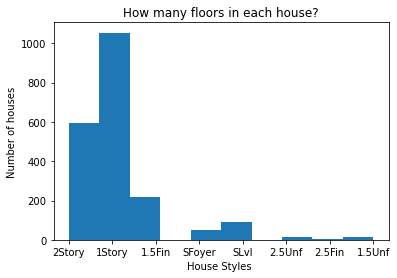

In [804]:
ax = house_styles.hist()
ax.grid(False)
ax.set(xlabel="House Styles ", ylabel = "Number of houses", title="How many floors in each house?");

A cleaner way to present this would be to create a **floors** column, that would contain 1 or 2 depending on the 1st Flr SF and 2nd Flr SF column.

All houses have a non-zero amount for 1st Flr SF (First Floor square feet), however not every house has a value the 2nd Flr SF (Second floor square feet).

If a house has a non-zero amount for 2nd Flr SF, then it's floors value is set to 2.

There should be 857 houses with floors set to 2

In [805]:
houses.loc[houses['2nd Flr SF'] >0].shape

(857, 107)

In [806]:
houses['floors'] = [2 if second_floor > 0 else 1 for second_floor in houses['2nd Flr SF']]
houses['floors'].value_counts()

1    1185
2     857
Name: floors, dtype: int64

#### Create bathrooms 

Bathroom information is captured in four different columns:
>Bsmt Full Bath (Discrete): Basement full bathrooms<br>
Bsmt Half Bath (Discrete): Basement half bathrooms<br>
Full Bath (Discrete): Full bathrooms above grade<br>
Half Bath (Discrete): Half baths above grade

Combine all four into one simple feature called **bathrooms**



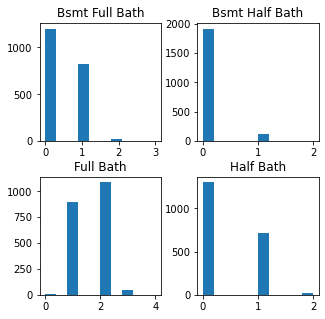

In [807]:
bath_columns = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']

ax = houses[bath_columns].hist( figsize=(5, 5), grid=False )

In [808]:
houses['bathrooms'] = houses[bath_columns].sum(axis=1)

#hat tip to this post on stackoverflow:
#https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns

### Save cleaned data to csv

In [809]:
houses.to_csv('../datasets/train_processed.csv', index=False)